In [1]:
import numpy as np
import pandas as pd

diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Preprocessing

In [2]:
median_bmi = diabetes['BMI'].median()
diabetes['BMI'] = diabetes['BMI'].replace(to_replace=0, value=median_bmi)

median_bloodPressure = diabetes['BloodPressure'].median()
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(to_replace=0, value=median_bloodPressure)

median_glucose = diabetes['Glucose'].median()
diabetes['Glucose'] = diabetes['Glucose'].replace(to_replace=0, value=median_glucose)

median_skinThickness = diabetes['SkinThickness'].median()
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(to_replace=0, value=median_skinThickness)

median_Insulin = diabetes['Insulin'].median()
diabetes['Insulin'] = diabetes['Insulin'].replace(to_replace=0, value=median_Insulin)


Number of patients diagnosed with Diabtetes disease:  500
Number of patients not diagnosed with Diabtetes disease:  268


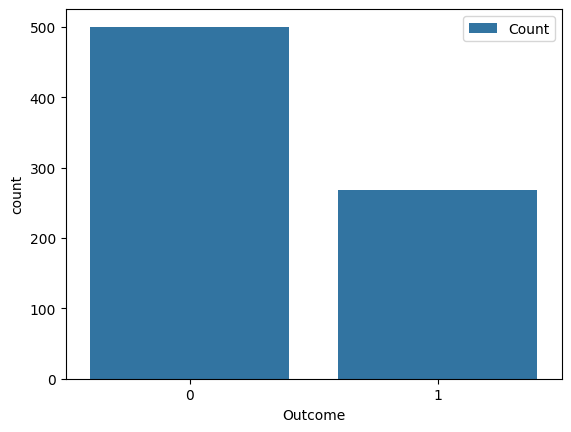

In [3]:
import seaborn as sns
sns.countplot(data=diabetes, x = 'Outcome', label='Count')

DB, NDB = diabetes['Outcome'].value_counts()
print('Number of patients diagnosed with Diabtetes disease: ',DB)
print('Number of patients not diagnosed with Diabtetes disease: ',NDB)

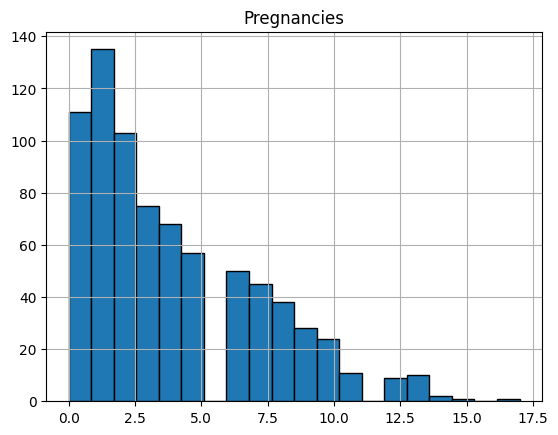

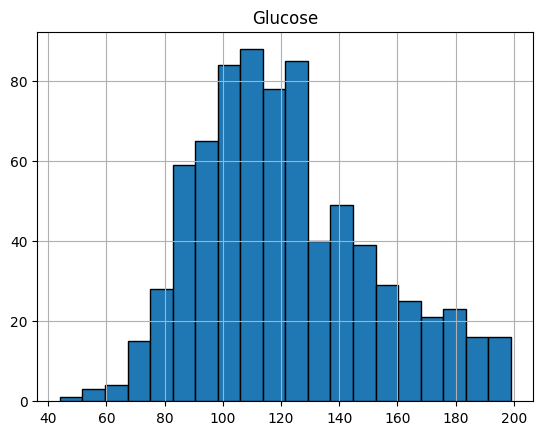

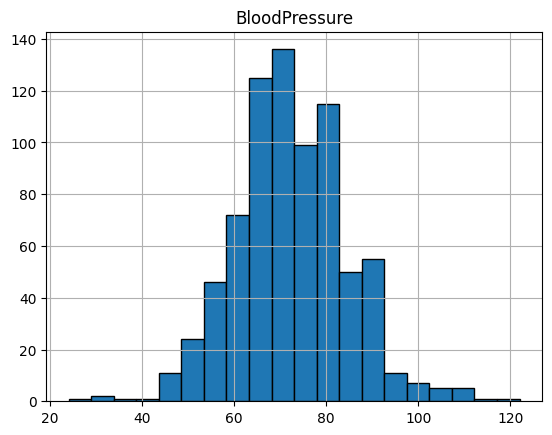

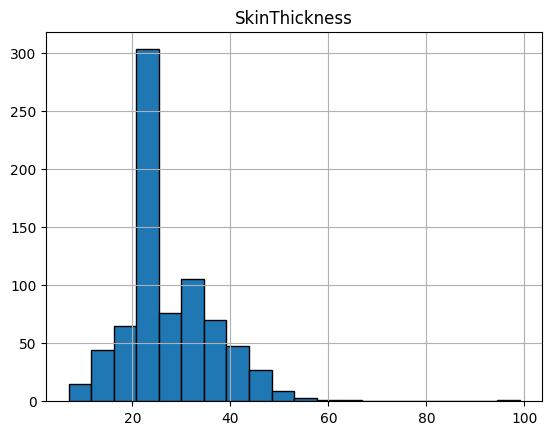

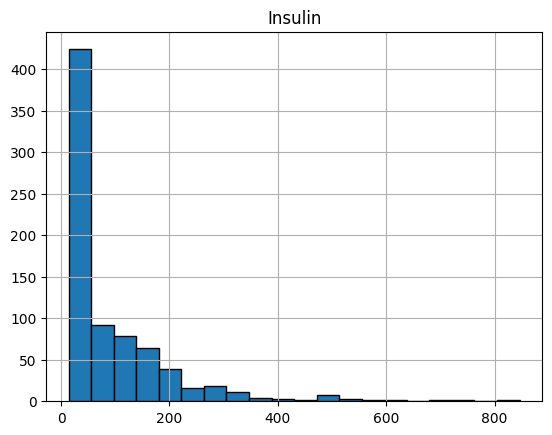

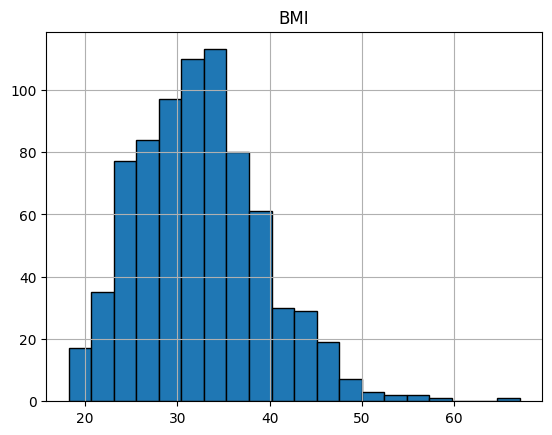

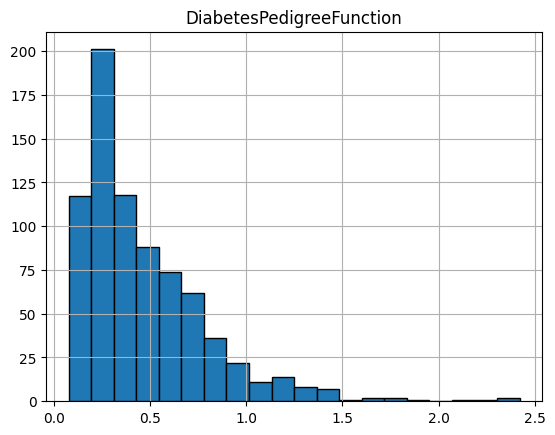

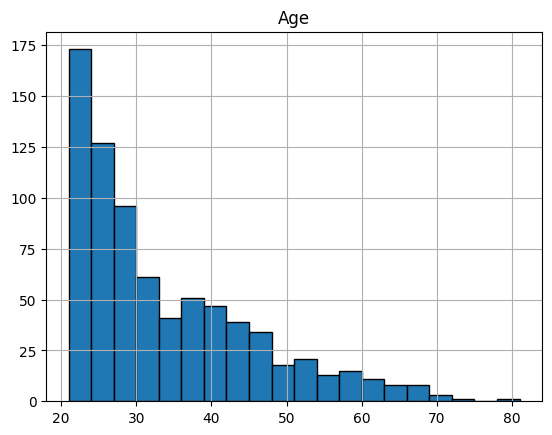

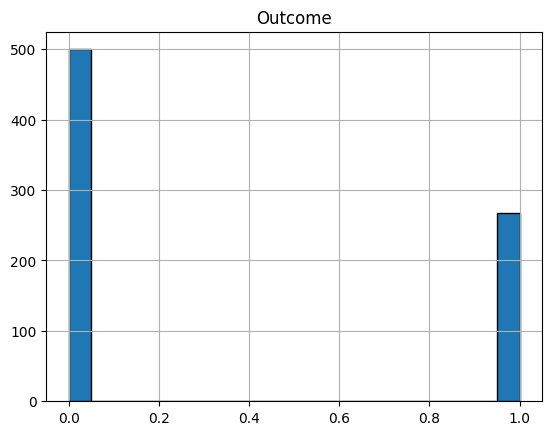

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


for i, column in enumerate(diabetes.columns):
    # sns.histplot(diabetes[column],   kde=True)
    diabetes[column].hist(bins=20,edgecolor='black')
    plt.title(column)
    plt.show()

In [5]:
# Split column for training and testing
x = diabetes.iloc[:,  0 :-1]
y = diabetes.iloc[:, -1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Multinomial Naive Bayes classifier apply to dataset

Accuracy:  0.6688311688311688
Confussion Metrix
[[81 18]
 [33 22]]


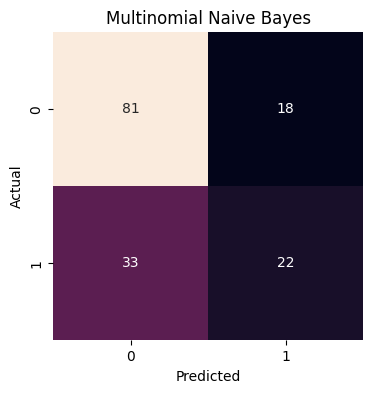

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

func = MultinomialNB()
func.fit(x_train, y_train)

y_pred = func.predict(x_test)
num = 0
arr = y_test.to_numpy()

for i in range(len(arr)):
    if arr[i] == y_pred[i]:
        num = num + 1
    pass

Accuracy = num / len(x_test)
print("Accuracy: ", Accuracy)

print("Confussion Metrix")
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, cbar=False)
plt.title("Multinomial Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Gaussian Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB
func = GaussianNB()
func.fit(x_train, y_train)
pred = func.predict(x_test)
arr = y_test.to_numpy()
num = 0
for i in range(len(y_test)):
    if arr[i] == pred[i]:
        num += 1
    pass
print(num)
Accuracy = num / len(x_test)
print(Accuracy)

118
0.7662337662337663


Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)
pred = model.predict(x_test)

num = 0
arr = y_test.to_numpy()
for i in range(len(y_test)):
    if arr[i] == pred[i]:
        num += 1
    pass
Accuracy = num / len(y_test)
print(num, Accuracy)


117 0.7597402597402597


Visualize Tree

In [7]:
from sklearn import tree
featureName = list(x_train.columns)
print(tree.export_text(model, class_names=["no", "yes"], feature_names=featureName))


|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |--- class: no
|   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |--- class: yes
|   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |--- class: no
|   |   |--- BMI >  30.95
|   |   |   |--- BloodPressure <= 37.00
|   |   |   |   |--- class: yes
|   |   |   |--- BloodPressure >  37.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- SkinThickness <= 8.50
|   |   |   |   |   |   |--- Glucose <= 109.50
|   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |--- Glucose >  109.50
|   |   |   |   |   |   |   |--- BMI <= 32.45
|   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |--- BMI >  32.45
|   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |--- SkinThickness >  8.50
|   |   |

Logistic Regression of Diabetes dataset

In [22]:
from sklearn.linear_model import LogisticRegression
# lbfgs take small memory in computer 
model = LogisticRegression(solver='lbfgs', max_iter=7200) 
model = model.fit(x_train, y_train)

y_pred = model.predict(x_test)
arr = y_test.to_numpy()

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred , arr))

num = 0
for i in range(len(arr)):
    if arr[i] == y_pred[i]:
        num = num + 1
    pass
print("Accuracy: " ,(num/len(arr)*100))

[[78 18]
 [21 37]]
Accuracy:  74.67532467532467


Support Vector Machine

In [33]:
from sklearn import svm
# Support Vector Classification
model = svm.SVC(kernel='linear')
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

arr = y_test.to_numpy()
from sklearn.metrics import accuracy_score

num = 0
for i in range(len(arr)):
    if arr[i] == y_pred[i]:
        num += 1
    pass

print("Accuracy: " , num/len(arr)*100)



Accuracy:  75.32467532467533
